In [315]:
import os

In [316]:
valid_extensions = ['.jpg', '.jpeg', '.png']
img_dir = 'Flicker8k/Flicker8k_Dataset'
train_id_file= 'Flicker8k/Flickr8k_text/Flickr_8k.trainImages.txt'
validation_id_file='Flicker8k/Flickr8k_text/Flickr_8k.devImages.txt'
test_id_file='Flicker8k/Flickr8k_text/Flickr_8k.testImages.txt'
token_file = 'Flicker8k/Flickr8k_text/Flickr8k.token.txt'

In [317]:
'''import io
from torchtext.vocab import build_vocab_from_iterator
def yield_tokens(file_path):
    with io.open(file_path, encoding = 'utf-8') as f:
      for line in f:
         yield line.strip().split()
vocab = build_vocab_from_iterator(yield_tokens(token_file), specials=["<unk>"])
vocab_size= vocab
print(len(vocab_size))

#Saving vocabulary

# Save the vocabulary to a file
vocab_file_path = '/Volumes/DriveB/Deep_learning_Models/Flicker8k_Vocabulary.txt'
with open(vocab_file_path, 'w', encoding='utf-8') as vocab_file:
    for token, idx in vocab.get_stoi().items():
        vocab_file.write(f"{token}\t{idx}\n")

print(f"Vocabulary saved to {vocab_file_path}")

SyntaxError: EOF while scanning triple-quoted string literal (3936205874.py, line 19)

In [318]:
import io
from torchtext.vocab import build_vocab_from_iterator

def yield_tokens(file_path):
    with io.open(file_path, encoding='utf-8') as f:
        for line in f:
            yield line.strip().split()

# Add special tokens to the vocabulary
def create_vocabulary(file_path, vocab_file_path):
    vocab = build_vocab_from_iterator(
        yield_tokens(file_path), 
        specials=["<unk>", "<pad>", "<start>", "<end>"]
    )
    vocab.set_default_index(vocab["<unk>"])

    # Save the vocabulary to a file
    with open(vocab_file_path, 'w', encoding='utf-8') as vocab_file:
        for token, idx in vocab.get_stoi().items():
            vocab_file.write(f"{token}\t{idx}\n")

    print(f"Vocabulary saved to {vocab_file_path}")
    return vocab

# Example usage
vocab_file_path = '/Volumes/DriveB/Deep_learning_Models/Flicker8k_Vocabulary_new.txt'
vocab = create_vocabulary(token_file, vocab_file_path)
vocab_size = vocab 
print(len(vocab_size))

Vocabulary saved to /Volumes/DriveB/Deep_learning_Models/Flicker8k_Vocabulary_new.txt
50094


In [319]:
with open(train_id_file, 'r') as file:
    train_ids = set(line.strip() for line in file)
train_set = []
for image_name in os.listdir(img_dir):
    imag_path = os.path.join(img_dir, image_name)
    if os.path.isfile(imag_path):
       _, ext = os.path.splitext(image_name)

       if ext.lower() in valid_extensions and image_name in train_ids:
           train_set.append(image_name)

print(len(train_set))


6000


In [320]:
with open(validation_id_file, 'r') as file:
    validation_ids = set(line.strip() for line in file)

validation_set = []

for image_name in os.listdir(img_dir):
    imag_path = os.path.join(img_dir, image_name)
    if os.path.isfile(imag_path):
        _, ext = os.path.splitext(image_name)

        if ext.lower() in valid_extensions and image_name in validation_ids:
            validation_set.append(image_name)
        
print(len(validation_set))

1000


In [321]:
with open(test_id_file, 'r') as file:
    test_ids = set(line.strip() for line in file)

test_set = []

for image_name in os.listdir(img_dir):
    imag_path = os.path.join(img_dir, image_name)
    if os.path.isfile(imag_path):
        _, ext = os.path.splitext(image_name)

        if ext.lower() in valid_extensions and image_name in test_ids:
           test_set.append(image_name)

print(len(test_set))
        

1000


In [322]:
token_file = 'Flicker8k/Flickr8k_text/Flickr8k.token.txt'
def parse_tokens(file_name):
    tokens = {}
    with open(file_name, 'r') as file:
       for lines in file:
          token_lines_parts = lines.strip().split('\t')
          image_id = token_lines_parts[0].split('#')[0]
          caption = token_lines_parts[1]
          if image_id not in tokens:
                tokens[image_id] = []

                tokens[image_id].append(caption)
    
    return tokens

caption_file = parse_tokens(token_file)

In [323]:
# Print the tokens or their count
print(caption_file)
print(f"Number of tokens: {len(caption_file)}")

{'1000268201_693b08cb0e.jpg': ['A child in a pink dress is climbing up a set of stairs in an entry way .'], '1001773457_577c3a7d70.jpg': ['A black dog and a spotted dog are fighting'], '1002674143_1b742ab4b8.jpg': ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .'], '1003163366_44323f5815.jpg': ['A man lays on a bench while his dog sits by him .'], '1007129816_e794419615.jpg': ['A man in an orange hat starring at something .'], '1007320043_627395c3d8.jpg': ['A child playing on a rope net .'], '1009434119_febe49276a.jpg': ['A black and white dog is running in a grassy garden surrounded by a white fence .'], '1012212859_01547e3f17.jpg': ['A dog shakes its head near the shore , a red ball next to it .'], '1015118661_980735411b.jpg': ['A boy smiles in front of a stony wall in a city .'], '1015584366_dfcec3c85a.jpg': ['A black dog leaps over a log .'], '101654506_8eb26cfb60.jpg': ['A brown and white dog is running through the snow .'], '101669240

In [324]:
train_captions = []
for img_id in train_set :
    if img_id in caption_file:
        train_captions.extend(caption_file[img_id])
    
print("Number of training captions are:", len(train_captions))


Number of training captions are: 6000


In [325]:
validation_captions = []
for img_id in validation_set:
    if img_id in caption_file:
        validation_captions.extend(caption_file[img_id])

print("Number of validation captions are:", len(validation_captions))

Number of validation captions are: 1000


In [326]:
test_captions = []
for img_id in test_set:
    if img_id in caption_file:
        test_captions.extend(caption_file[img_id])
print("Number of test captions are:", len(test_captions))

Number of test captions are: 1000


In [327]:
for captions in train_captions:
    print(captions)

A group of people are partying at a masquerade party .
A girl is smiling at the camera with a crowd of people behind her .
A man in a neon-colored vest holding up a section of wood
A black and white dog jumping over a red and white bar .
A man and woman , on a park trail , pose in front of a lake and distant mountain .
A man in a kayak is holding his paddle up high .
Boy skating across a metal rail .
a woman holding a baby hanging from a branch and a small child hanging on that same branch .
A child covered with paint sits amid trays of multicolored paint on a surface thoroughly saturated with paint .
A man and a woman are sitting down and eating .
A lady laughs as she and a man drink coffee .
A little girl in a rain puddle .
A baby crawls at a playground .
A girl in a black outfir is standing with 2 pug dogs
A blond woman with her hand on the throat of a blond girl .
A boy getting ready as the man wearing all black straps him into a black harness to climb the wall .
A man is talking t

In [328]:
for captions in validation_captions:
    print(captions)

A boy in a party hat splashes in the water .
Hikers cross a bridge over a fast moving stream and rocky scenery .
A bicyclist is jumping on ramp covered with graffiti .
A boy jumping off a yellow spring board .
A homeless man stands in the street with a black dog .
A man is snowboarding down a skislope .
A blond toddler wearing a blue sweater , riding on a wooden toy .
A girl in a blue bathing suit is walking away from the water on the beach .
A man on a bicycle in the city .
Two dogs drink water in a lake .
At the bottom of a set of stairs , there are two men and a tent .
Two girls in pink are playing on yellow playground bars .
A black and white dog with a green collar stands in front of a sign .
A person wearing a blue hat takes a photo in the snow .
A black man with facial hair wears a navy hat and blue jacket in front of a white background .
A brown dog making a funny face while standing on a beach .
A black and white dog leaping out of the water .
A child playing in some leaves .


In [329]:
import torch
from torch.utils.data import Dataset

class CaptionDataset(Dataset):
    def __init__(self, captions):
        self.captions = captions

    def __len__(self):
        return len(self.captions)

    def __getitem__(self, idx):
        return self.captions[idx]

    def max_caption_length(self):
        return max(len(caption.split()) for caption in self.captions)

# Example list of captions
captions_train = train_captions
captions_validation = validation_captions
captions_test = test_captions

# Create dataset and find max caption length
dataset = CaptionDataset(captions)
train_max_length = dataset.max_caption_length()
val_max_length = dataset.max_caption_length()
test_max_length = dataset.max_caption_length()

print("Maximum train caption length:", train_max_length)
print("Maximum validation caption length:", val_max_length)
print("Maximum test caption length:", test_max_length)


Maximum train caption length: 1
Maximum validation caption length: 1
Maximum test caption length: 1


In [330]:
for captions in test_captions:
    print(captions)

Two Dobermans fighting or playing together on a lawn .
a dirt biker turns across the dirt .
A brown dog laying in the grass with a white chew toy .
A couple practice different ways to wear sunglasses in front of a red car .
A bald man is attempting to slam dunk a basketball in a game while people in the stands watch .
A man in a white shirt swinging a stick
A Japanese swordsman jumps into the air .
Two boys stand in an ocean as the sun sets .
Killer whales perform for a crowd .
A child plays on the floor .
A dog runs in the snow .
A group of people are rowing a boat in a contest .
a boy enjoys a rain shower .
A group of young men clowning around while enjoying a beverage .
A man in a leather jacket and striped shirt points at something off camera .
A crowd of dark skinned people standing outside of white tents .
A man playing cricket , his bat pointed to the sky .
A group of people stand in the sand looking out at the water .
A boy with an orange shirt smiles , while a boy in a blue sh

In [331]:
import os
import pandas as pd
from PIL import Image
import torch
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import transforms

class CustomImageDataset(Dataset):
    def __init__(self, image_names, captions, img_dir, transform=None):
        self.image_names = image_names 
        self.captions = captions
        self.img_dir = img_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.image_names)
    
    def __getitem__(self, idx):
        img_name = self.image_names[idx]
        img_path = os.path.join(self.img_dir, img_name)
        image = Image.open(img_path).convert("RGB")
        caption = self.captions[idx]

        if self.transform:
            image = self.transform(image)

        return image, caption

In [332]:
from torch.utils.data import default_collate
def custom_collate_fn(batch):
    batch = list(filter(lambda x: x[0] is not None, batch))
    return torch.utils.data.default_collate(batch)

In [333]:
from torchvision.transforms import transforms
#Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])


In [334]:
# Create datasets
train_dataset = CustomImageDataset(train_set, train_captions, img_dir, transform=transform)
validation_dataset = CustomImageDataset(validation_set, validation_captions, img_dir, transform=transform)
test_dataset = CustomImageDataset(test_set, test_captions, img_dir, transform=transform)

In [335]:
# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=default_collate)
validation_loader = DataLoader(validation_dataset, batch_size=32, shuffle=False, collate_fn=default_collate)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False,collate_fn=default_collate)

In [336]:
try:
    for images, captions in train_loader:
        print(images.size(), captions)
        break
except Exception as e:
    print(f"Error occured: {str(e)}")

torch.Size([32, 3, 224, 224]) ('a football player catching the football .', 'Three boys leaping into a swimming pool .', 'A dog shakes its head near the shore , a red ball next to it .', 'A child in a red jacket , sitting atop a slide .', 'A closeup of two women standing together .', 'A man and a woman wearing masks embrace at an outdoor festival .', 'A cricket batsman swinging', 'Tourists pose for camera at night .', 'A big , brown dog running through the water', 'A brown and white dog is running up a grassy hill .', 'A brown and white dog is leaping over a log in a field while another dog follows behind it .', 'brown dogs and a woman in a yard', 'A group of boys sits near the sidewalk and two are smiling while one makes a face .', 'A baby holding glasses looks at the camera while a man hugs him .', 'A fisherman sits on the roll of chain .', 'A dirt biker in red speeds on clay road while being videotaped by a man in black .', 'a fluffy little dog running through the snow', 'Dog leaps 

In [337]:
try: 
    for images, captions in validation_loader:
        print(images.size(), captions)
        break
except Exception as e:
    print(f"Error occured: {str(e)}")
 

torch.Size([32, 3, 224, 224]) ('A boy in a party hat splashes in the water .', 'Hikers cross a bridge over a fast moving stream and rocky scenery .', 'A bicyclist is jumping on ramp covered with graffiti .', 'A boy jumping off a yellow spring board .', 'A homeless man stands in the street with a black dog .', 'A man is snowboarding down a skislope .', 'A blond toddler wearing a blue sweater , riding on a wooden toy .', 'A girl in a blue bathing suit is walking away from the water on the beach .', 'A man on a bicycle in the city .', 'Two dogs drink water in a lake .', 'At the bottom of a set of stairs , there are two men and a tent .', 'Two girls in pink are playing on yellow playground bars .', 'A black and white dog with a green collar stands in front of a sign .', 'A person wearing a blue hat takes a photo in the snow .', 'A black man with facial hair wears a navy hat and blue jacket in front of a white background .', 'A brown dog making a funny face while standing on a beach .', 'A 

In [338]:
# Checking if DataLoader works
try:
    for images, captions in test_loader:
        print(images.size(), captions)
        break
except Exception as e:
    print(f"Error occurred: {str(e)}")
 

torch.Size([32, 3, 224, 224]) ('Two Dobermans fighting or playing together on a lawn .', 'a dirt biker turns across the dirt .', 'A brown dog laying in the grass with a white chew toy .', 'A couple practice different ways to wear sunglasses in front of a red car .', 'A bald man is attempting to slam dunk a basketball in a game while people in the stands watch .', 'A man in a white shirt swinging a stick', 'A Japanese swordsman jumps into the air .', 'Two boys stand in an ocean as the sun sets .', 'Killer whales perform for a crowd .', 'A child plays on the floor .', 'A dog runs in the snow .', 'A group of people are rowing a boat in a contest .', 'a boy enjoys a rain shower .', 'A group of young men clowning around while enjoying a beverage .', 'A man in a leather jacket and striped shirt points at something off camera .', 'A crowd of dark skinned people standing outside of white tents .', 'A man playing cricket , his bat pointed to the sky .', 'A group of people stand in the sand look

In [339]:
import torch

# Fallback to CPU if MPS is not available
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")



Using device: mps


In [357]:
import os
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import transforms
from torch.nn.utils.rnn import pad_sequence

class CustomImageDataset(Dataset):
    def __init__(self, image_names, captions, img_dir, transform=None):
        self.image_names = image_names
        self.captions = captions
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        img_name = self.image_names[idx]
        img_path = os.path.join(self.img_dir, img_name)
        image = Image.open(img_path).convert("RGB")
        caption = self.captions[idx]

        # Convert caption to list of indices if it’s a string
        if isinstance(caption, str):
            caption = list(map(int, caption.split()))  # Adjust this according to your caption format

        caption_tensor = torch.tensor(caption, dtype=torch.long)

        if self.transform:
            image = self.transform(image)

        return image, caption_tensor



def custom_collate_fn(batch):
    images, captions = zip(*batch)
    
    # Debugging
    print("Debugging information:")
    for i, caption in enumerate(captions):
        print(f"Caption {i}: {caption}, Type: {type(caption)}, Length: {len(caption)}")

    images = torch.stack(images)
    captions = pad_sequence(captions, batch_first=True, padding_value=vocab["<pad>"])
    
    return images, captions




train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=custom_collate_fn)


try:
    for images, captions in train_loader:
        print(f"Images type: {type(images)}")
        print(f"Captions type: {type(captions)}")
        print(f"Images shape: {images.size()}")
        print(f"Captions shape: {captions.size()}")
        break
except Exception as e:
    print(f"Error occurred: {str(e)}")




Debugging information:
Caption 0: A hair dresser is applying permed on a client 's hair in a salon ., Type: <class 'str'>, Length: 66
Caption 1: A black and white dog is chewing on a camera ., Type: <class 'str'>, Length: 46
Caption 2: A thin girl in black smokes a cigarette ., Type: <class 'str'>, Length: 41
Caption 3: A black dog running in the surf ., Type: <class 'str'>, Length: 33
Caption 4: A boy hangs upside down from a metal bar ., Type: <class 'str'>, Length: 42
Caption 5: A family sits , works , and talks in the kitchen ., Type: <class 'str'>, Length: 50
Caption 6: A boy dressed as Spiderman ringing a door bell, Type: <class 'str'>, Length: 46
Caption 7: A black haired girl is eating corn on the cob ., Type: <class 'str'>, Length: 47
Caption 8: A brown dog on a leash runs through the white water ., Type: <class 'str'>, Length: 53
Caption 9: A brown dog chases a Frisbee, Type: <class 'str'>, Length: 28
Caption 10: A pet dog , standing on bank is looking at another brown dog in

In [358]:
try: 
    for images, captions in validation_loader:
        print(images.size(), captions)
        break
except Exception as e:
    print(f"Error occured: {str(e)}")
 

torch.Size([32, 3, 224, 224]) ('A boy in a party hat splashes in the water .', 'Hikers cross a bridge over a fast moving stream and rocky scenery .', 'A bicyclist is jumping on ramp covered with graffiti .', 'A boy jumping off a yellow spring board .', 'A homeless man stands in the street with a black dog .', 'A man is snowboarding down a skislope .', 'A blond toddler wearing a blue sweater , riding on a wooden toy .', 'A girl in a blue bathing suit is walking away from the water on the beach .', 'A man on a bicycle in the city .', 'Two dogs drink water in a lake .', 'At the bottom of a set of stairs , there are two men and a tent .', 'Two girls in pink are playing on yellow playground bars .', 'A black and white dog with a green collar stands in front of a sign .', 'A person wearing a blue hat takes a photo in the snow .', 'A black man with facial hair wears a navy hat and blue jacket in front of a white background .', 'A brown dog making a funny face while standing on a beach .', 'A 

In [369]:
import io
from torchtext.vocab import build_vocab_from_iterator
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import transforms
from torch.nn.utils.rnn import pad_sequence

# Function to tokenize captions
def tokenize_caption(caption, vocab):
    tokens = caption.lower().split()  # Adjust this according to your tokenizer
    token_ids = [vocab.get(token, vocab["<unk>"]) for token in tokens]
    return torch.tensor(token_ids, dtype=torch.long)

class CustomImageDataset(Dataset):
    def __init__(self, image_names, captions, img_dir, vocab, transform=None):
        self.image_names = image_names
        self.captions = captions
        self.img_dir = img_dir
        self.transform = transform
        self.vocab = vocab

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        img_name = self.image_names[idx]
        img_path = os.path.join(self.img_dir, img_name)
        image = Image.open(img_path).convert("RGB")
        caption = self.captions[idx]
        caption_tensor = tokenize_caption(caption, self.vocab)

        if self.transform:
            image = self.transform(image)

        return image, caption_tensor

# Custom collate function
def custom_collate_fn(batch):
    images, captions = zip(*batch)
    
    # Debugging
    print("Debugging information:")
    for i, caption in enumerate(captions):
        print(f"Caption {i}: {caption}, Type: {type(caption)}, Length: {len(caption)}")

    images = torch.stack(images)
    captions = pad_sequence(captions, batch_first=True, padding_value=vocab["<pad>"])
    
    return images, captions

# Create vocabulary
def create_vocabulary(file_path, vocab_file_path):
    vocab = build_vocab_from_iterator(
        yield_tokens(file_path), 
        specials=["<unk>", "<pad>", "<start>", "<end>"]
    )
    vocab.set_default_index(vocab["<unk>"])

    # Save the vocabulary to a file
    with open(vocab_file_path, 'w', encoding='utf-8') as vocab_file:
        for token, idx in vocab.get_stoi().items():
            vocab_file.write(f"{token}\t{idx}\n")

    print(f"Vocabulary saved to {vocab_file_path}")
    return vocab

# Function to load vocabulary
def load_vocab(vocab_file_path):
    vocab = {}
    with open(vocab_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            token, idx = line.strip().split('\t')
            vocab[token] = int(idx)
    return vocab

# Example usage
vocab_file_path = '/Volumes/DriveB/Deep_learning_Models/Flicker8k_Vocabulary_new.txt'
vocab = load_vocab(vocab_file_path)

# Load dataset
train_dataset = CustomImageDataset(train_set, train_captions, img_dir, vocab, transform=transform)
validation_dataset = CustomImageDataset(validation_set, validation_captions, img_dir, vocab, transform=transform)
test_dataset = CustomImageDataset(test_set, test_captions, img_dir, vocab, transform=transform)

batch_size=32
# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate_fn)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False, collate_fn=custom_collate_fn)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=custom_collate_fn)


In [370]:
import torch.nn as nn
import torch
from torchvision import models
from torchvision.models import EfficientNet_V2_M_Weights
class EfficientNetV2Encoder_CNN(nn.Module):

    def __init__(self, base_model):
        super(EfficientNetV2Encoder_CNN, self).__init__()
        # Load the EfficientNet V2 model with pretrained weights
        base_model = models.efficientnet_v2_m(weights=EfficientNet_V2_M_Weights.IMAGENET1K_V1)
        for param in base_model.parameters():
            param.requires_grad = False
        self.features = base_model.features
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(p=0.05)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.features(x)
        x = self.relu(x)
        x = self.avgpool(x)
        x = self.dropout(x)
        x = self.flatten(x)
        x = self.softmax(x)
        return x

# Create the encoder model
encoder_model = EfficientNetV2Encoder_CNN(base_model)

#Eample input tensor
input_tensor = torch.randn(32,3,244,244)

# Forward pass through the encoder model
output_tensor = encoder_model(input_tensor)
print(output_tensor.shape)

torch.Size([32, 1280])


In [371]:
class DecoderRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers=1):
        super(DecoderRNN, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.feature_projection = nn.Linear(1280, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, vocab_size)

    def forward(self, features, captions):
        projected_features = self.feature_projection(features)
        embeddings = self.embed(captions[:, :-1])  # Exclude the last token (for teacher forcing)
        projected_features = projected_features.unsqueeze(1)
        inputs = torch.cat((projected_features, embeddings), 1)
        hiddens, _ = self.lstm(inputs)
        outputs = self.linear(hiddens)
        return outputs

    def sample(self, features, states=None, max_len=34):
        """ Generate captions for given image features using greedy search """
        sampled_ids = []
        inputs = features.unsqueeze(1)
        inputs = self.feature_projection(inputs)
        for i in range(max_len):
            hiddens, states = self.lstm(inputs, states)
            outputs = self.linear(hiddens.squeeze(1))
            _, predicted = outputs.max(1)
            sampled_ids.append(predicted)
            inputs = self.embed(predicted)
            inputs = inputs.unsqueeze(1)
        sampled_ids = torch.stack(sampled_ids, 1)
        return sampled_ids



In [372]:
import torch
import torch.nn as nn
from torch.optim import Adam
# Define vocab_size for testing
# Define vocab_size for testing
vocab_size = 50091  # Example vocab size

# Create the encoder and decoder
encoder = EfficientNetV2Encoder_CNN(base_model)
decoder = DecoderRNN(embed_size=256, hidden_size=512, vocab_size=vocab_size, num_layers=1)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
params = list(decoder.parameters()) + list(encoder.parameters())
optimizer = Adam(params, lr=0.001)

# Example input tensor for the encoded features and captions
images = torch.randn(32, 3, 244, 244)  # Batch size of 32, 3 color channels, 244x244 image
captions = torch.randint(0, vocab_size, (32, 34))  # Batch size of 32, 34 words per caption (vocab size of 50091)

# Forward pass through the encoder and decoder
encoder_output = encoder(images)  # Should be of shape [32, 1280]
decoder_output = decoder(encoder_output, captions)

# Check shapes
print(f"Encoder output shape: {encoder_output.shape}")
print(f"Decoder output shape: {decoder_output.shape}")
print(f"Captions shape: {captions.shape}")

# Compute the loss
targets = captions[:, 1:].reshape(-1)  # Shifted targets for cross-entropy loss
outputs = decoder_output[:, :-1, :].reshape(-1, vocab_size)  # Ensure output shape matches [batch_size * (sequence_length - 1), vocab_size]

print(f"Targets shape: {targets.shape}")
print(f"Outputs shape: {outputs.shape}")

loss = criterion(outputs, targets)

# Backpropagation and optimization
optimizer.zero_grad()
loss.backward()
optimizer.step()

print("Loss:", loss.item())  # Should print the loss value

Encoder output shape: torch.Size([32, 1280])
Decoder output shape: torch.Size([32, 34, 50091])
Captions shape: torch.Size([32, 34])
Targets shape: torch.Size([1056])
Outputs shape: torch.Size([1056, 50091])
Loss: 10.823945999145508


In [373]:
import nltk
from nltk.translate.bleu_score import sentence_bleu
import numpy as np

# Download NLTK data for BLEU score calculation
nltk.download('punkt')

#Defining a function to compute blue score
def compute_blue_score(references, hypotheses, pad_idx):
    blue_scores = []
    for ref, hyp in zip(references, hypotheses):
        ref = [word for word in ref if word!=pad_idx]
        hyp = [word for word in hyp if word != pad_idx]
        blue_scores.append(sentence_bleu([ref], hyp))
    return np.mean(blue_scores)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mahjabeenmohiuddin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [374]:
def train_model(encoder, decoder, criterion, optimizer, train_loader, vocab_size, device):
    encoder.train()
    decoder.train()
    total_loss = 0
    
    for batch in train_loader:
        images, captions = batch
        images, captions = images.to(device), captions.to(device)
        
        optimizer.zero_grad()
        
        encoder_output = encoder(images)
        decoder_output = decoder(encoder_output, captions)

        targets = captions[:, 1:]
        target_mask = targets != vocab["<pad>"]
        targets = targets[target_mask].reshape(-1)
        outputs = decoder_output[:, :-1, :].reshape(-1, vocab_size)
        outputs = outputs[target_mask.reshape(-1)]

        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(train_loader)


In [375]:
def validate_model(encoder, decoder, criterion, validation_loader, vocab_size, device):
    encoder.eval()
    decoder.eval()
    total_loss = 0

    with torch.no_grad():
        for batch in validation_loader:
            images, captions = batch
            images, captions = images.to(device), captions.to(device)
            
            encoder_output = encoder(images)
            decoder_output = decoder(encoder_output, captions)

            targets = captions[:, 1:]
            target_mask = targets != vocab["<pad>"]
            targets = targets[target_mask].reshape(-1)
            outputs = decoder_output[:, :-1, :].reshape(-1, vocab_size)
            outputs = outputs[target_mask.reshape(-1)]

            loss = criterion(outputs, targets)
            total_loss += loss.item()

    return total_loss / len(validation_loader)


In [376]:
def test_model(encoder, decoder, test_loader, vocab, device):
    encoder.eval()
    decoder.eval()
    references = []
    hypotheses = []

    with torch.no_grad():
        for images, captions in test_loader:
            images = images.to(device)
            encoder_output = encoder(images)
            sampled_ids = decoder.sample(encoder_output)
            sampled_ids = sampled_ids.cpu().numpy()

            for i in range(len(captions)):
                reference = [word for word in captions[i] if word != vocab['<pad>']]
                hypothesis = [word for word in sampled_ids[i] if word != vocab['<pad>']]
                references.append(reference)
                hypotheses.append(hypothesis)

    bleu_score = compute_blue_score(references, hypotheses)  # Fixed function name here
    return bleu_score



In [378]:
def main():
    # Parameters
    embed_size = 256
    hidden_size = 512
    num_layers = 1
    num_epochs = 10
    batch_size = 32
    learning_rate = 0.001

    # Load vocabulary from file
    vocab_file_path = '/Volumes/DriveB/Deep_learning_Models/Flicker8k_Vocabulary_new.txt'
    vocab = {}
    with open(vocab_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            token, idx = line.strip().split('\t')
            vocab[token] = int(idx)

    pad_idx = vocab.get("<pad>", None)
    if pad_idx is None:
        raise ValueError("Vocabulary does not contain <pad> token.")

    vocab_size = len(vocab)

    # Load dataset
    train_dataset = CustomImageDataset(train_set, train_captions, img_dir,vocab,  transform=transform)
    validation_dataset = CustomImageDataset(validation_set, validation_captions, img_dir,vocab, transform=transform)
    test_dataset = CustomImageDataset(test_set, test_captions, img_dir, vocab, transform=transform)

    # Create DataLoader
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate_fn)
    validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False, collate_fn=custom_collate_fn)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=custom_collate_fn)

    # Initialize models
    device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
    base_model = models.efficientnet_v2_m(weights=EfficientNet_V2_M_Weights.IMAGENET1K_V1)
    encoder = EfficientNetV2Encoder_CNN(base_model).to(device)
    decoder = DecoderRNN(embed_size, hidden_size, vocab_size, num_layers).to(device)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss(ignore_index=pad_idx)
    params = list(decoder.parameters()) + list(encoder.parameters())
    optimizer = Adam(params, lr=learning_rate)

    # Training and validation loop
    for epoch in range(num_epochs):
        train_loss = train_model(encoder, decoder, criterion, optimizer, train_loader, vocab_size, device)
        val_loss = validate_model(encoder, decoder, criterion, validation_loader, vocab_size, device)
        print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    # Test the model
    bleu_score = test_model(encoder, decoder, test_loader, vocab, device)
    print(f'Test BLEU Score: {bleu_score:.4f}')

if __name__ == "__main__":
    main()


Debugging information:
Caption 0: tensor([  4, 100, 275,  26, 583,  83,   7,  52,  15,   4,  17, 122,   5]), Type: <class 'torch.Tensor'>, Length: 13
Caption 1: tensor([   4,   20,    7,    4,   17,   42,   11,  239,    7, 1365,  123,  512,
           4,   18, 3691]), Type: <class 'torch.Tensor'>, Length: 15
Caption 2: tensor([   4,   20,   10,  302,   24, 1288,    4,  460,  889,  618,    4,  926,
         398,  585,    5]), Type: <class 'torch.Tensor'>, Length: 15
Caption 3: tensor([   4, 1704,    7,   61,   11,    4, 1704,    7,   34,   19,  240,   98,
         482,   41,    4,  130, 3419,    5]), Type: <class 'torch.Tensor'>, Length: 18
Caption 4: tensor([  4, 234, 198,  77,   8, 100,  13, 714, 583,   9,   5]), Type: <class 'torch.Tensor'>, Length: 11
Caption 5: tensor([   4,   30,   12, 1079,    4,   44,   89,   15,    8,   28,    5]), Type: <class 'torch.Tensor'>, Length: 11
Caption 6: tensor([  4,  14,   7, 138, 459, 564,   4,  44,  27,   8,  69,   5]), Type: <class 'torch.Tensor

KeyboardInterrupt: 

In [ ]:
for batch in train_loader:
    print(type(batch))  # Print the type of batch
    print(len(batch))   # Print the length of the batch
    break


<class 'list'>
2


In [379]:
import io
import os
from torchtext.vocab import build_vocab_from_iterator
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import transforms
from torch.nn.utils.rnn import pad_sequence
import numpy as np
import nltk
from nltk.translate.bleu_score import sentence_bleu
from torchvision import models
from torchvision.models import EfficientNet_V2_M_Weights
import matplotlib.pyplot as plt

# Function to tokenize captions
def tokenize_caption(caption, vocab):
    tokens = caption.lower().split()  # Adjust this according to your tokenizer
    token_ids = [vocab.get(token, vocab["<unk>"]) for token in tokens]
    return torch.tensor(token_ids, dtype=torch.long)

class CustomImageDataset(Dataset):
    def __init__(self, image_names, captions, img_dir, vocab, transform=None):
        self.image_names = image_names
        self.captions = captions
        self.img_dir = img_dir
        self.transform = transform
        self.vocab = vocab

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        img_name = self.image_names[idx]
        img_path = os.path.join(self.img_dir, img_name)
        image = Image.open(img_path).convert("RGB")
        caption = self.captions[idx]
        caption_tensor = tokenize_caption(caption, self.vocab)

        if self.transform:
            image = self.transform(image)

        return image, caption_tensor


In [380]:

# Custom collate function
def custom_collate_fn(batch):
    images, captions = zip(*batch)
    
    images = torch.stack(images)
    captions = pad_sequence(captions, batch_first=True, padding_value=vocab["<pad>"])
    
    return images, captions

In [381]:
# Create vocabulary
def create_vocabulary(file_path, vocab_file_path):
    vocab = build_vocab_from_iterator(
        yield_tokens(file_path), 
        specials=["<unk>", "<pad>", "<start>", "<end>"]
    )
    vocab.set_default_index(vocab["<unk>"])

    # Save the vocabulary to a file
    with open(vocab_file_path, 'w', encoding='utf-8') as vocab_file:
        for token, idx in vocab.get_stoi().items():
            vocab_file.write(f"{token}\t{idx}\n")

    print(f"Vocabulary saved to {vocab_file_path}")
    return vocab

# Function to load vocabulary
def load_vocab(vocab_file_path):
    vocab = {}
    with open(vocab_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            token, idx = line.strip().split('\t')
            vocab[token] = int(idx)
    return vocab


In [389]:
import torch.nn as nn
import torch
from torchvision import models
from torchvision.models import EfficientNet_V2_M_Weights
class EfficientNetV2Encoder_CNN(nn.Module):

    def __init__(self, base_model):
        super(EfficientNetV2Encoder_CNN, self).__init__()
        # Load the EfficientNet V2 model with pretrained weights
        base_model = models.efficientnet_v2_m(weights=EfficientNet_V2_M_Weights.IMAGENET1K_V1)
        for param in base_model.parameters():
            param.requires_grad = False
        self.features = base_model.features
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(p=0.05)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.features(x)
        x = self.relu(x)
        x = self.avgpool(x)
        x = self.dropout(x)
        x = self.flatten(x)
        x = self.softmax(x)
        return x

# Create the encoder model
encoder_model = EfficientNetV2Encoder_CNN(base_model)

#Eample input tensor
input_tensor = torch.randn(32,3,244,244)

# Forward pass through the encoder model
output_tensor = encoder_model(input_tensor)
print(output_tensor.shape)

torch.Size([32, 1280])


In [382]:
# BLEU Score computation
def compute_blue_score(references, hypotheses, pad_idx):
    blue_scores = []
    for ref, hyp in zip(references, hypotheses):
        ref = [word for word in ref if word != pad_idx]
        hyp = [word for word in hyp if word != pad_idx]
        blue_scores.append(sentence_bleu([ref], hyp))
    return np.mean(blue_scores)

In [390]:
class DecoderRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers=1):
        super(DecoderRNN, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.feature_projection = nn.Linear(1280, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, vocab_size)

    def forward(self, features, captions):
        projected_features = self.feature_projection(features)
        embeddings = self.embed(captions[:, :-1])  # Exclude the last token (for teacher forcing)
        projected_features = projected_features.unsqueeze(1)
        inputs = torch.cat((projected_features, embeddings), 1)
        hiddens, _ = self.lstm(inputs)
        outputs = self.linear(hiddens)
        return outputs

    def sample(self, features, states=None, max_len=34):
        """ Generate captions for given image features using greedy search """
        sampled_ids = []
        inputs = features.unsqueeze(1)
        inputs = self.feature_projection(inputs)
        for i in range(max_len):
            hiddens, states = self.lstm(inputs, states)
            outputs = self.linear(hiddens.squeeze(1))
            _, predicted = outputs.max(1)
            sampled_ids.append(predicted)
            inputs = self.embed(predicted)
            inputs = inputs.unsqueeze(1)
        sampled_ids = torch.stack(sampled_ids, 1)
        return sampled_ids



In [394]:

def train_model(encoder, decoder, criterion, optimizer, train_loader, vocab_size, device):
    encoder.train()
    decoder.train()
    total_loss = 0
    
    for batch in train_loader:
        images, captions = batch
        images, captions = images.to(device), captions.to(device)
        
        optimizer.zero_grad()
        
        encoder_output = encoder(images)
        decoder_output = decoder(encoder_output, captions)

        targets = captions[:, 1:]
        target_mask = targets != vocab["<pad>"]
        targets = targets[target_mask].reshape(-1)
        outputs = decoder_output[:, :-1, :].reshape(-1, vocab_size)
        outputs = outputs[target_mask.reshape(-1)]

        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(train_loader)

In [395]:
def validate_model(encoder, decoder, criterion, validation_loader, vocab_size, device):
    encoder.eval()
    decoder.eval()
    total_loss = 0

    with torch.no_grad():
        for batch in validation_loader:
            images, captions = batch
            images, captions = images.to(device), captions.to(device)
            
            encoder_output = encoder(images)
            decoder_output = decoder(encoder_output, captions)

            targets = captions[:, 1:]
            target_mask = targets != vocab["<pad>"]
            targets = targets[target_mask].reshape(-1)
            outputs = decoder_output[:, :-1, :].reshape(-1, vocab_size)
            outputs = outputs[target_mask.reshape(-1)]

            loss = criterion(outputs, targets)
            total_loss += loss.item()

    return total_loss / len(validation_loader)

In [396]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import models
from torchvision.models.efficientnet import EfficientNet_V2_M_Weights
import numpy as np

# Define or import the compute_bleu_score function
def compute_bleu_score(references, hypotheses, pad_token):
    # Assuming BLEU score calculation is implemented here
    # Import necessary library for BLEU score computation (e.g., nltk.translate.bleu_score)
    from nltk.translate.bleu_score import corpus_bleu
    return corpus_bleu([[ref] for ref in references], hypotheses)

def display_images_with_captions(images, ground_truths, predictions, vocab):
    num_images = len(images)
    fig, axes = plt.subplots(nrows=3, ncols=num_images, figsize=(15, 10))

    for i, (img, gt, pred) in enumerate(zip(images, ground_truths, predictions)):
        # Check image tensor dimensions
        if img.shape[0] == 3:
            img = img.permute(1, 2, 0)  # Convert to (H, W, C) for display

        # Normalize image if necessary
        img = (img - img.min()) / (img.max() - img.min())
        
        # Ensure image is in the range [0, 1]
        img = np.clip(img.numpy(), 0, 1)

        ax = axes[0, i]
        ax.imshow(img)
        ax.axis('off')
        ax.set_title("Image")

        ax = axes[1, i]
        gt_caption = ' '.join([token for token in gt if token != vocab.get("<pad>", "")])
        ax.text(0.5, 0.5, f"GT: {gt_caption}", ha='center', va='center')
        ax.axis('off')
        ax.set_title("Ground Truth")

        ax = axes[2, i]
        pred_caption = ' '.join([token for token in pred if token != vocab.get("<pad>", "")])
        ax.text(0.5, 0.5, f"Pred: {pred_caption}", ha='center', va='center')
        ax.axis('off')
        ax.set_title("Prediction")

    plt.tight_layout()
    plt.show()


In [397]:

def test_model(encoder, decoder, test_loader, vocab, device):
    encoder.eval()
    decoder.eval()
    references = []
    hypotheses = []
    images_list = []
    ground_truths = []
    predictions = []

    with torch.no_grad():
        for images, captions in test_loader:
            images = images.to(device)
            encoder_output = encoder(images)
            sampled_ids = decoder.sample(encoder_output)
            sampled_ids = sampled_ids.cpu().numpy()

            for i in range(len(captions)):
                reference = [word for word in captions[i] if word != vocab.get('<pad>', '')]
                hypothesis = [word for word in sampled_ids[i] if word != vocab.get('<pad>', '')]
                references.append(reference)
                hypotheses.append(hypothesis)
                
                images_list.append(images[i].cpu())
                ground_truths.append(reference)
                predictions.append(hypothesis)

    bleu_score = compute_bleu_score(references, hypotheses, vocab.get('<pad>', ''))
    print(f'Test BLEU Score: {bleu_score:.4f}')
    
    # Display images with captions
    display_images_with_captions(images_list[:5], ground_truths[:5], predictions[:5], vocab)
    
    return bleu_score

def main():
    # Parameters
    embed_size = 256
    hidden_size = 512
    num_layers = 1
    num_epochs = 10
    batch_size = 32
    learning_rate = 0.001

    # Load vocabulary from file
    vocab_file_path = '/Volumes/DriveB/Deep_learning_Models/Flicker8k_Vocabulary_new.txt'
    vocab = load_vocab(vocab_file_path)

    pad_idx = vocab.get("<pad>", None)
    if pad_idx is None:
        raise ValueError("Vocabulary does not contain <pad> token.")

    vocab_size = len(vocab)

    # Load dataset
    train_dataset = CustomImageDataset(train_set, train_captions, img_dir, vocab, transform=transform)
    validation_dataset = CustomImageDataset(validation_set, validation_captions, img_dir, vocab, transform=transform)
    test_dataset = CustomImageDataset(test_set, test_captions, img_dir, vocab, transform=transform)

    # Create DataLoader
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate_fn)
    validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False, collate_fn=custom_collate_fn)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=custom_collate_fn)

    # Initialize models
    device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
    base_model = models.efficientnet_v2_m(weights=EfficientNet_V2_M_Weights.IMAGENET1K_V1)
    encoder = EfficientNetV2Encoder_CNN(base_model).to(device)
    decoder = DecoderRNN(embed_size, hidden_size, vocab_size, num_layers).to(device)
    
    # Initialize model, criterion, optimizer
    criterion = torch.nn.CrossEntropyLoss(ignore_index=pad_idx)
    optimizer = torch.optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=learning_rate)

    for epoch in range(num_epochs):
        train_loss = train_model(encoder, decoder, criterion, optimizer, train_loader, vocab_size, device)
        val_loss = validate_model(encoder, decoder, criterion, validation_loader, vocab_size, device)
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

        test_bleu_scores = test_model(encoder, decoder, test_loader, vocab, device)
    print("Test BLEU Scores:", test_bleu_scores)

if __name__ == "__main__":
    main()


Epoch [1/10], Train Loss: 5.7966, Val Loss: 5.1158
Epoch [2/10], Train Loss: 4.8657, Val Loss: 4.9624
Epoch [3/10], Train Loss: 4.7765, Val Loss: 5.1033
Epoch [4/10], Train Loss: 4.8573, Val Loss: 5.0171
Epoch [5/10], Train Loss: 4.6884, Val Loss: 4.9649
Epoch [6/10], Train Loss: 4.5732, Val Loss: 4.9179
Epoch [7/10], Train Loss: 4.5962, Val Loss: 5.0063
Epoch [8/10], Train Loss: 4.5953, Val Loss: 4.9402
Epoch [9/10], Train Loss: 4.4882, Val Loss: 4.9219
Epoch [10/10], Train Loss: 4.4116, Val Loss: 4.9047
Test BLEU Score: 0.0000


TypeError: sequence item 0: expected str instance, Tensor found

In [405]:
from nltk.translate.bleu_score import corpus_bleu

def compute_bleu_scores(references, hypotheses, pad_token):
    """
    Computes BLEU scores for BLEU-1, BLEU-2, BLEU-3, and BLEU-4.
    
    :param references: List of lists of reference captions.
    :param hypotheses: List of lists of predicted captions.
    :param pad_token: Padding token to ignore.
    :return: A tuple of BLEU scores for BLEU-1, BLEU-2, BLEU-3, and BLEU-4.
    """
    # Convert references and hypotheses to the format required by corpus_bleu
    references = [[ref] for ref in references]  # Each reference should be wrapped in a list
    hypotheses = [hyp for hyp in hypotheses]
    
    # Calculate BLEU scores
    bleu1 = corpus_bleu(references, hypotheses, weights=(1.0, 0, 0, 0))
    bleu2 = corpus_bleu(references, hypotheses, weights=(0.5, 0.5, 0, 0))
    bleu3 = corpus_bleu(references, hypotheses, weights=(0.33, 0.33, 0.33, 0))
    bleu4 = corpus_bleu(references, hypotheses, weights=(0.25, 0.25, 0.25, 0.25))
    
    return bleu1, bleu2, bleu3, bleu4



In [407]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import models
from torchvision.models.efficientnet import EfficientNet_V2_M_Weights


def test_model(encoder, decoder, test_loader, vocab, device):
    encoder.eval()
    decoder.eval()
    references = []
    hypotheses = []
    images_list = []
    ground_truths = []
    predictions = []

    with torch.no_grad():
        for images, captions in test_loader:
            images = images.to(device)
            encoder_output = encoder(images)
            sampled_ids = decoder.sample(encoder_output)
            sampled_ids = sampled_ids.cpu().numpy()

            for i in range(len(captions)):
                reference = [word for word in captions[i] if word != vocab.get('<pad>', '')]
                hypothesis = [word for word in sampled_ids[i] if word != vocab.get('<pad>', '')]
                references.append(reference)
                hypotheses.append(hypothesis)
                
                images_list.append(images[i].cpu())
                ground_truths.append(reference)
                predictions.append(hypothesis)

    # Compute BLEU scores
    bleu1, bleu2, bleu3, bleu4 = compute_bleu_scores(references, hypotheses, vocab.get('<pad>', ''))
    print(f'Test BLEU-1 Score: {bleu1:.4f}')
    print(f'Test BLEU-2 Score: {bleu2:.4f}')
    print(f'Test BLEU-3 Score: {bleu3:.4f}')
    print(f'Test BLEU-4 Score: {bleu4:.4f}')
    
    # Display images with captions
    display_images_with_captions(images_list[:5], ground_truths[:5], predictions[:5], vocab)
    
    return bleu1, bleu2, bleu3, bleu4

In [408]:


def main():
    # Parameters
    embed_size = 256
    hidden_size = 512
    num_layers = 1
    num_epochs = 10
    batch_size = 32
    learning_rate = 0.001

    # Load vocabulary from file
    vocab_file_path = '/Volumes/DriveB/Deep_learning_Models/Flicker8k_Vocabulary_new.txt'
    vocab = load_vocab(vocab_file_path)

    pad_idx = vocab.get("<pad>", None)
    if pad_idx is None:
        raise ValueError("Vocabulary does not contain <pad> token.")

    vocab_size = len(vocab)

    # Load dataset
    train_dataset = CustomImageDataset(train_set, train_captions, img_dir, vocab, transform=transform)
    validation_dataset = CustomImageDataset(validation_set, validation_captions, img_dir, vocab, transform=transform)
    test_dataset = CustomImageDataset(test_set, test_captions, img_dir, vocab, transform=transform)

    # Create DataLoader
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate_fn)
    validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False, collate_fn=custom_collate_fn)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=custom_collate_fn)

    # Initialize models
    device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
    base_model = models.efficientnet_v2_m(weights=EfficientNet_V2_M_Weights.IMAGENET1K_V1)
    encoder = EfficientNetV2Encoder_CNN(base_model).to(device)
    decoder = DecoderRNN(embed_size, hidden_size, vocab_size, num_layers).to(device)
    
    # Initialize model, criterion, optimizer
    criterion = torch.nn.CrossEntropyLoss(ignore_index=pad_idx)
    optimizer = torch.optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=learning_rate)

    for epoch in range(num_epochs):
        train_loss = train_model(encoder, decoder, criterion, optimizer, train_loader, vocab_size, device)
        val_loss = validate_model(encoder, decoder, criterion, validation_loader, vocab_size, device)
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    test_bleu_scores = test_model(encoder, decoder, test_loader, vocab, device)
    print("Test BLEU Scores:", test_bleu_scores)

if __name__ == "__main__":
    main()


Epoch [1/10], Train Loss: 5.7389, Val Loss: 4.9408
Epoch [2/10], Train Loss: 4.6529, Val Loss: 4.7384
Epoch [3/10], Train Loss: 4.3875, Val Loss: 4.6582
Epoch [4/10], Train Loss: 4.1894, Val Loss: 4.6227
Epoch [5/10], Train Loss: 4.0160, Val Loss: 4.6151
Epoch [6/10], Train Loss: 3.8574, Val Loss: 4.6147
Epoch [7/10], Train Loss: 3.7042, Val Loss: 4.6430
Epoch [8/10], Train Loss: 3.5497, Val Loss: 4.6679
Epoch [9/10], Train Loss: 3.3982, Val Loss: 4.6899
Epoch [10/10], Train Loss: 3.2438, Val Loss: 4.7288
Test BLEU-1 Score: 0.0000
Test BLEU-2 Score: 0.0000
Test BLEU-3 Score: 0.0000
Test BLEU-4 Score: 0.0000


TypeError: sequence item 0: expected str instance, Tensor found

In [415]:
import matplotlib.pyplot as plt
import numpy as np

def display_images_with_captions(images, ground_truths, predictions, vocab):
    num_images = len(images)
    fig, axes = plt.subplots(nrows=3, ncols=num_images, figsize=(15, 10))

    # Create an inverse vocabulary mapping
    vocab_inv = {idx: word for word, idx in vocab.items()}

    for i, (img, gt, pred) in enumerate(zip(images, ground_truths, predictions)):
        # Check image tensor dimensions
        if img.shape[0] == 3:
            img = img.permute(1, 2, 0)  # Convert to (H, W, C) for display

        # Debugging prints
        print(f"Image shape: {img.shape}")
        print(f"Image min: {img.min().item()}, max: {img.max().item()}")

        # Normalize image if necessary
        img = (img - img.min()) / (img.max() - img.min() + 1e-8)  # Add a small epsilon to avoid division by zero

        # Ensure image is in the range [0, 1]
        img = np.clip(img.numpy(), 0, 1)

        # Display image
        ax = axes[0, i]
        ax.imshow(img)
        ax.axis('off')
        ax.set_title("Image")

        # Display ground truth
        ax = axes[1, i]
        gt_caption = ' '.join([vocab_inv[token] for token in gt])
        ax.text(0.5, 0.5, f"GT: {gt_caption}", ha='center', va='center', wrap=True)
        ax.axis('off')
        ax.set_title("Ground Truth")

        # Display prediction
        ax = axes[2, i]
        pred_caption = ' '.join([vocab_inv[token] for token in pred])
        ax.text(0.5, 0.5, f"Pred: {pred_caption}", ha='center', va='center', wrap=True)
        ax.axis('off')
        ax.set_title("Prediction")

    plt.tight_layout()
    plt.show()


In [416]:
def test_model(encoder, decoder, test_loader, vocab, device):
    encoder.eval()
    decoder.eval()
    references = []
    hypotheses = []
    images_list = []
    ground_truths = []
    predictions = []

    with torch.no_grad():
        for images, captions in test_loader:
            images = images.to(device)
            encoder_output = encoder(images)
            sampled_ids = decoder.sample(encoder_output)
            sampled_ids = sampled_ids.cpu().numpy()

            for i in range(len(captions)):
                reference = [word for word in captions[i] if word != vocab.get('<pad>', '')]
                hypothesis = [word for word in sampled_ids[i] if word != vocab.get('<pad>', '')]
                references.append(reference)
                hypotheses.append(hypothesis)
                
                images_list.append(images[i].cpu())
                ground_truths.append(reference)
                predictions.append(hypothesis)

    # Debugging prints
    print(f"Number of images: {len(images_list)}")
    if len(images_list) > 0:
        print(f"Sample image shape: {images_list[0].shape}")

    bleu1, bleu2, bleu3, bleu4 = compute_bleu_scores(references, hypotheses, vocab.get('<pad>', ''))
    print(f'BLEU-1 Score: {bleu1:.4f}')
    print(f'BLEU-2 Score: {bleu2:.4f}')
    print(f'BLEU-3 Score: {bleu3:.4f}')
    print(f'BLEU-4 Score: {bleu4:.4f}')
    
    # Display images with captions
    display_images_with_captions(images_list[:5], ground_truths[:5], predictions[:5], vocab)
    
    return bleu1, bleu2, bleu3, bleu4


In [418]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def display_images_with_captions(images, ground_truths, predictions, vocab):
    num_images = len(images)
    fig, axes = plt.subplots(nrows=3, ncols=num_images, figsize=(15, 10))

    # Create an inverse vocabulary mapping
    vocab_inv = {idx: word for word, idx in vocab.items()}

    for i, (img, gt, pred) in enumerate(zip(images, ground_truths, predictions)):
        if img.shape[0] == 3:
            img = img.permute(1, 2, 0)

        img = (img - img.min()) / (img.max() - img.min() + 1e-8)  # Normalize and avoid division by zero
        img = np.clip(img.numpy(), 0, 1)

        ax = axes[0, i]
        ax.imshow(img)
        ax.axis('off')
        ax.set_title("Image")

        ax = axes[1, i]
        gt_caption = ' '.join([vocab_inv.get(token, '') for token in gt])
        ax.text(0.5, 0.5, f"GT: {gt_caption}", ha='center', va='center')
        ax.axis('off')
        ax.set_title("Ground Truth")

        ax = axes[2, i]
        pred_caption = ' '.join([vocab_inv.get(token, '') for token in pred])
        ax.text(0.5, 0.5, f"Pred: {pred_caption}", ha='center', va='center')
        ax.axis('off')
        ax.set_title("Prediction")

    plt.tight_layout()
    plt.show()


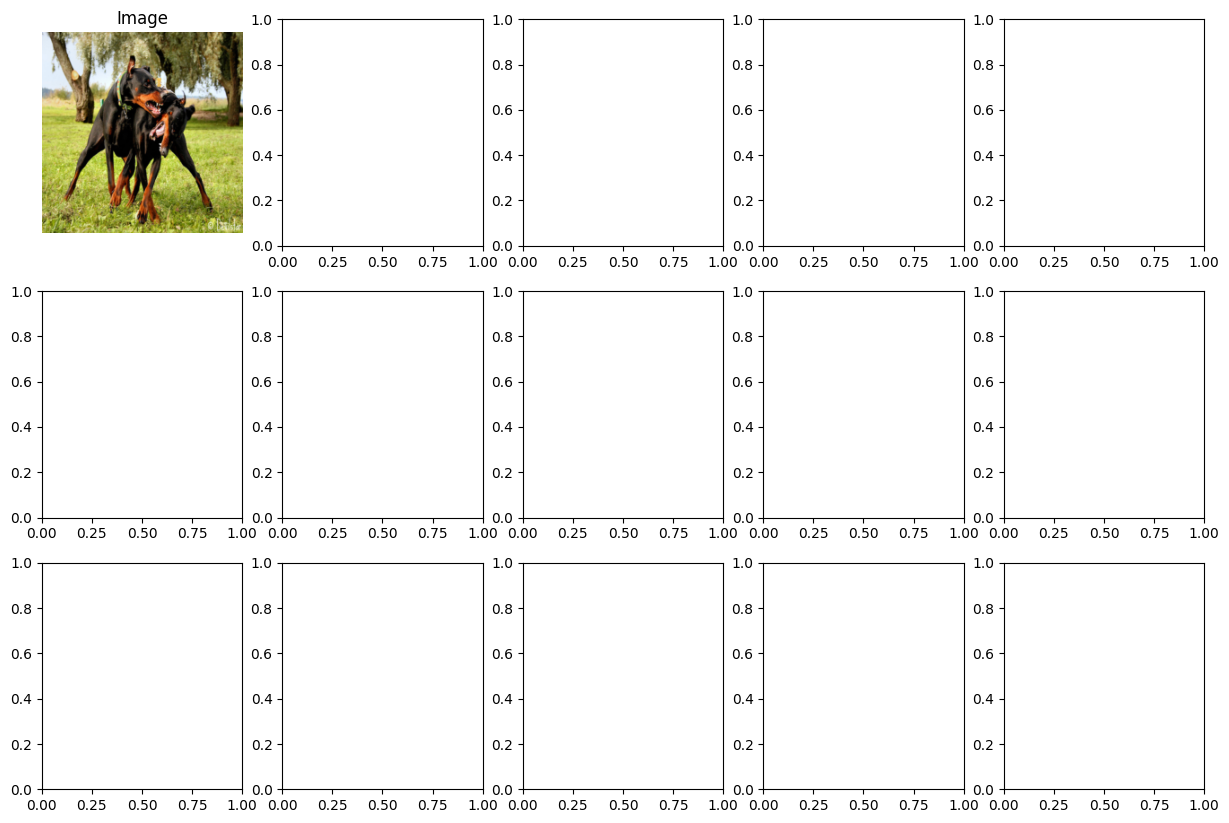

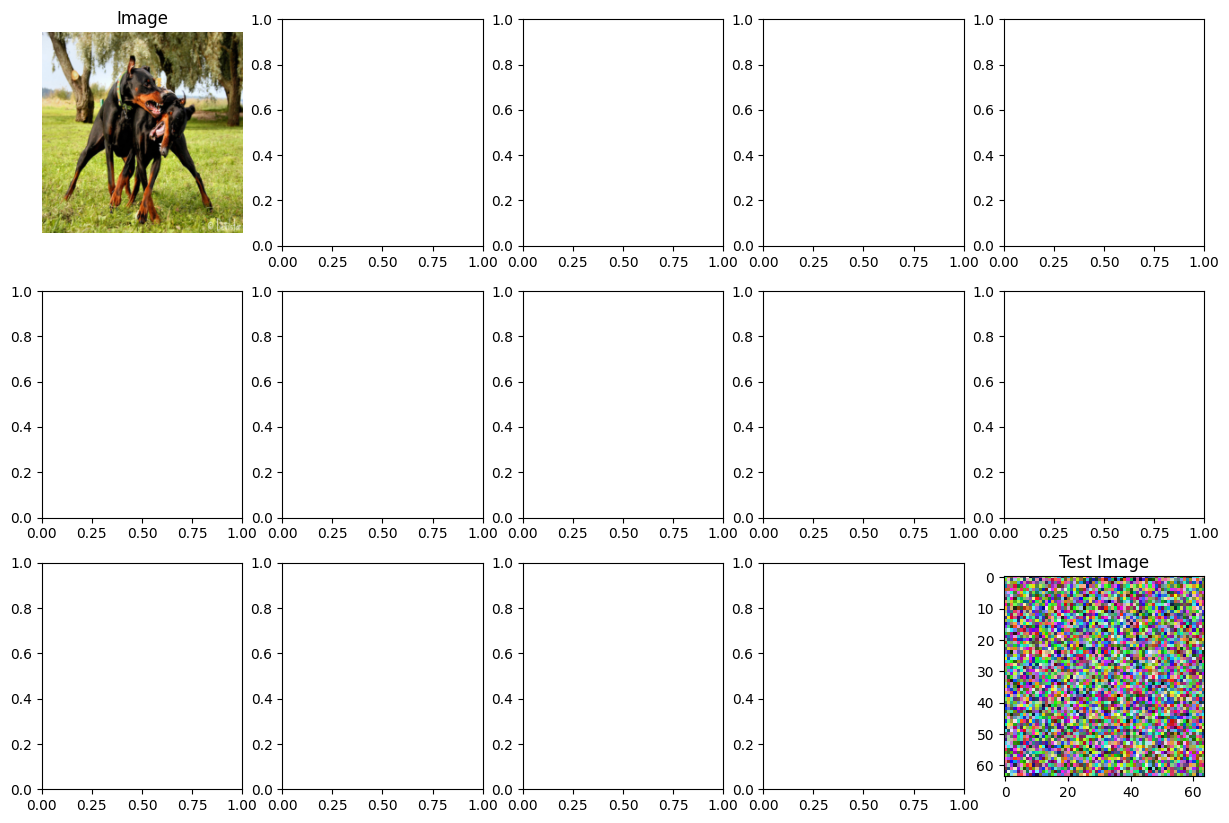

In [419]:
import matplotlib.pyplot as plt
import numpy as np

# Create a dummy image
img = np.random.rand(64, 64, 3)

plt.imshow(img)
plt.title("Test Image")
plt.show()


In [420]:

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import DataLoader

# Assuming you have the following imported
# from your_project import CustomImageDataset, load_vocab, EfficientNetV2Encoder_CNN, DecoderRNN, compute_bleu_scores

def display_images_with_captions(images, ground_truths, predictions, vocab):
    num_images = len(images)
    fig, axes = plt.subplots(nrows=3, ncols=num_images, figsize=(15, 10))

    # Create an inverse vocabulary mapping
    vocab_inv = {idx: word for word, idx in vocab.items()}

    for i, (img, gt, pred) in enumerate(zip(images, ground_truths, predictions)):
        if img.shape[0] == 3:
            img = img.permute(1, 2, 0)

        img = (img - img.min()) / (img.max() - img.min() + 1e-8)  # Normalize and avoid division by zero
        img = np.clip(img.numpy(), 0, 1)

        ax = axes[0, i]
        ax.imshow(img)
        ax.axis('off')
        ax.set_title("Image")

        ax = axes[1, i]
        gt_caption = ' '.join([vocab_inv.get(token, '') for token in gt])
        ax.text(0.5, 0.5, f"GT: {gt_caption}", ha='center', va='center')
        ax.axis('off')
        ax.set_title("Ground Truth")

        ax = axes[2, i]
        pred_caption = ' '.join([vocab_inv.get(token, '') for token in pred])
        ax.text(0.5, 0.5, f"Pred: {pred_caption}", ha='center', va='center')
        ax.axis('off')
        ax.set_title("Prediction")

    plt.tight_layout()
    plt.show()

def test_model(encoder, decoder, test_loader, vocab, device):
    encoder.eval()
    decoder.eval()
    references = []
    hypotheses = []
    images_list = []
    ground_truths = []
    predictions = []

    with torch.no_grad():
        for images, captions in test_loader:
            images = images.to(device)
            encoder_output = encoder(images)
            sampled_ids = decoder.sample(encoder_output)
            sampled_ids = sampled_ids.cpu().numpy()

            for i in range(len(captions)):
                reference = [word for word in captions[i] if word != vocab.get('<pad>', '')]
                hypothesis = [word for word in sampled_ids[i] if word != vocab.get('<pad>', '')]
                references.append(reference)
                hypotheses.append(hypothesis)

                images_list.append(images[i].cpu())
                ground_truths.append(reference)
                predictions.append(hypothesis)

    # Compute BLEU scores
    bleu1, bleu2, bleu3, bleu4 = compute_bleu_scores(references, hypotheses, vocab.get('<pad>', ''))
    print(f'BLEU-1 Score: {bleu1:.4f}')
    print(f'BLEU-2 Score: {bleu2:.4f}')
    print(f'BLEU-3 Score: {bleu3:.4f}')
    print(f'BLEU-4 Score: {bleu4:.4f}')

    # Display images with captions
    display_images_with_captions(images_list[:5], ground_truths[:5], predictions[:5], vocab)

    return bleu1, bleu2, bleu3, bleu4


In [421]:

test_bleu_scores = test_model(encoder, decoder, test_loader, vocab, device)
print("Test BLEU Scores:", test_bleu_scores)

Debugging information:
Caption 0: tensor([   56, 47557,   359,   491,    38,   153,     9,     4,   389,     5]), Type: <class 'torch.Tensor'>, Length: 10
Caption 1: tensor([   4,  108,  303, 1279,  129,    8,  108,    5]), Type: <class 'torch.Tensor'>, Length: 8
Caption 2: tensor([   4,   30,   12,  273,    7,    8,   46,   13,    4,   17, 1484,  109,
           5]), Type: <class 'torch.Tensor'>, Length: 13
Caption 3: tensor([   4,  234, 2123,  773, 5467,   24,  754,  205,    7,   52,   15,    4,
          29,  146,    5]), Type: <class 'torch.Tensor'>, Length: 15
Caption 4: tensor([   4,  652,   14,   10,  663,   24, 4115, 3779,    4,  165,    7,    4,
         173,   39,   31,    7,    8,   83,  233,    5]), Type: <class 'torch.Tensor'>, Length: 20
Caption 5: tensor([  4,  14,   7,   4,  17,  42, 335,   4, 132]), Type: <class 'torch.Tensor'>, Length: 9
Caption 6: tensor([   4,    0, 5362,   75,   67,    8,   68,    5]), Type: <class 'torch.Tensor'>, Length: 8
Caption 7: tensor([  56

RuntimeError: Input type (MPSFloatType) and weight type (torch.FloatTensor) should be the same